## THIS IS FIRST ITERATION OF THE SCRPT

In [56]:
#IMPORING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [57]:
#LOADING THE DATASET

avocado_df = pd.read_csv('avocado.csv')
avocado_df.head(17)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [58]:
#SORTING THE DATASET ACCORDING TO THE DATE

avocado_df = avocado_df.sort_values(by='Date')
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


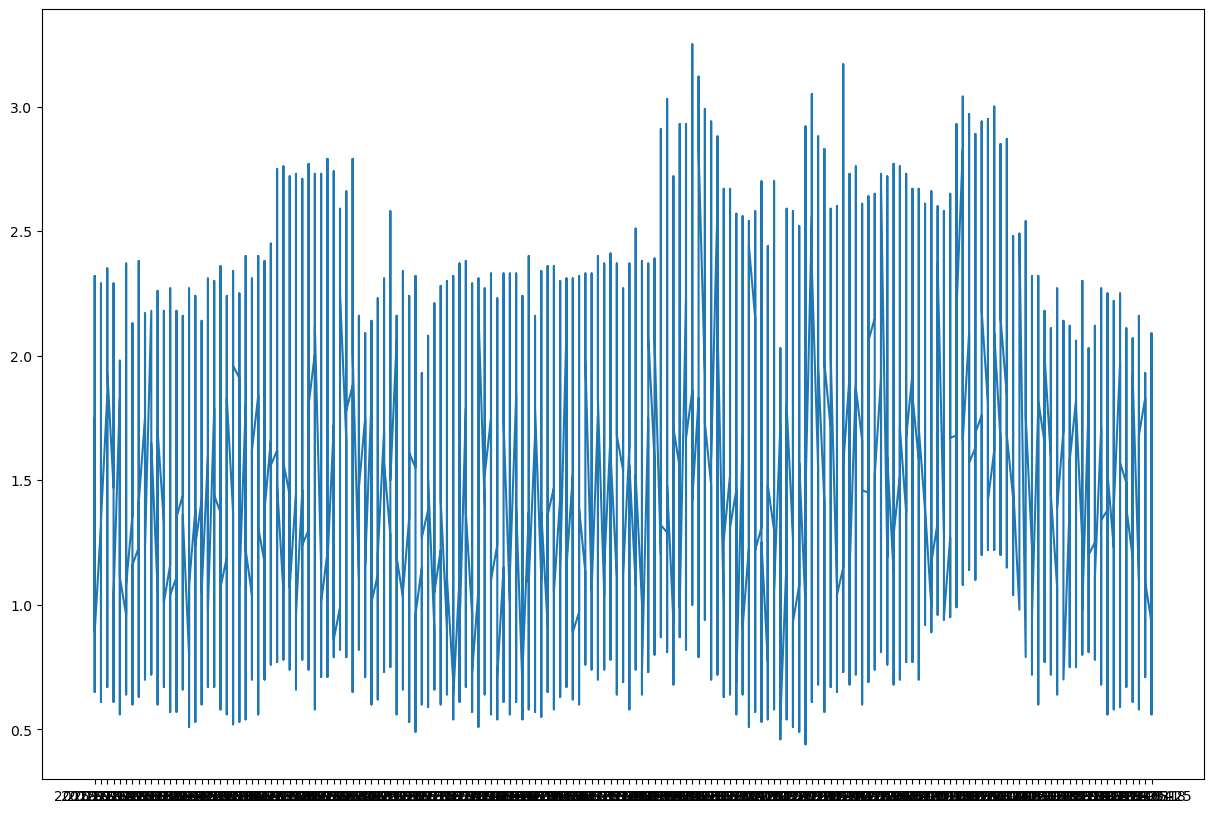

In [59]:
#VISUALIZING THE DATASET - DATE VS AVERAGE PRICE

plt.figure(figsize=(15, 10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

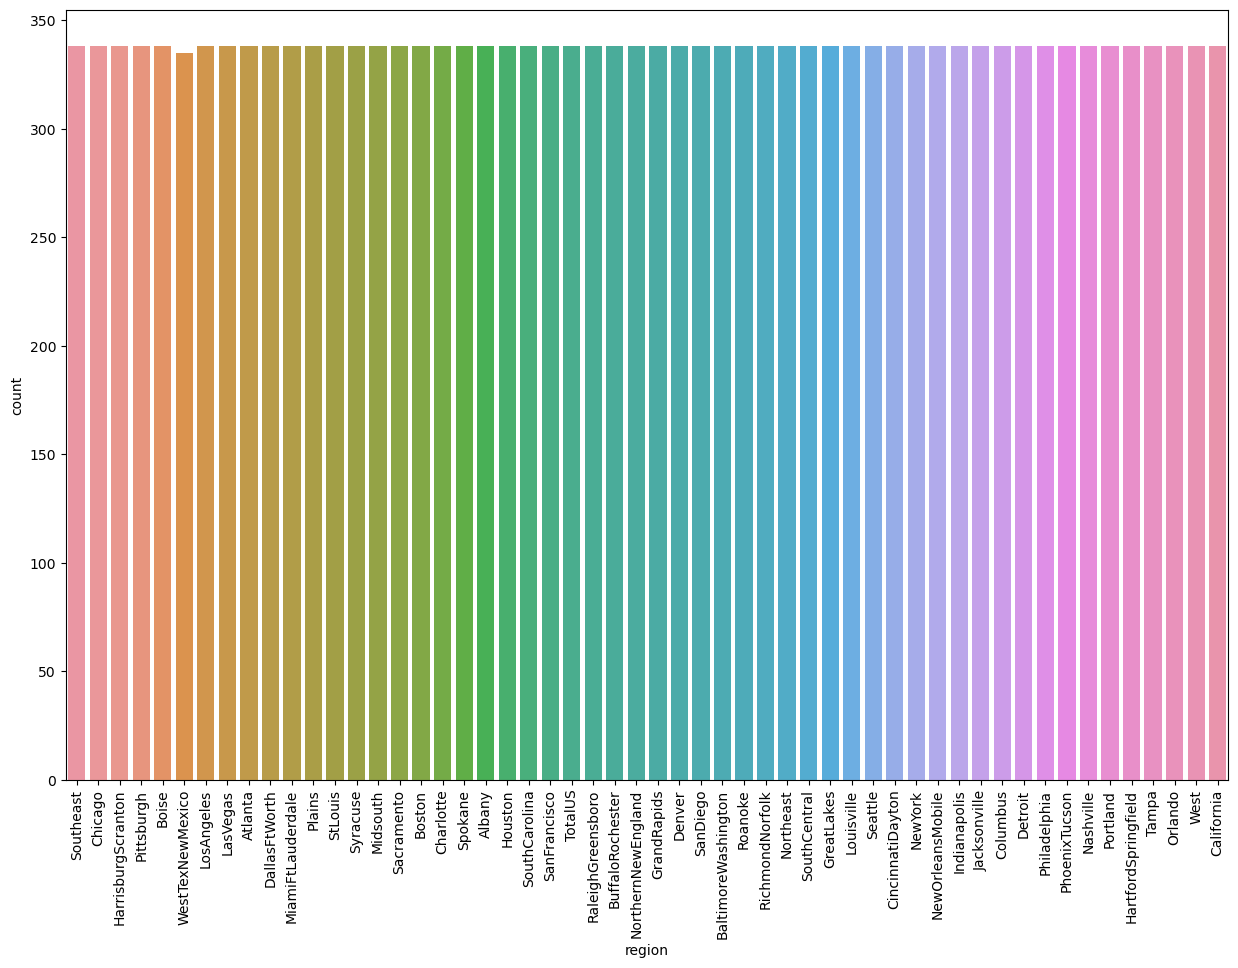

In [60]:
#VISUALIZING THE DATASET - COUNT OF AVOCADOS PER REGION

plt.figure(figsize = (15,10))
sns.countplot(x='region',data=avocado_df)
plt.xticks(rotation=90)

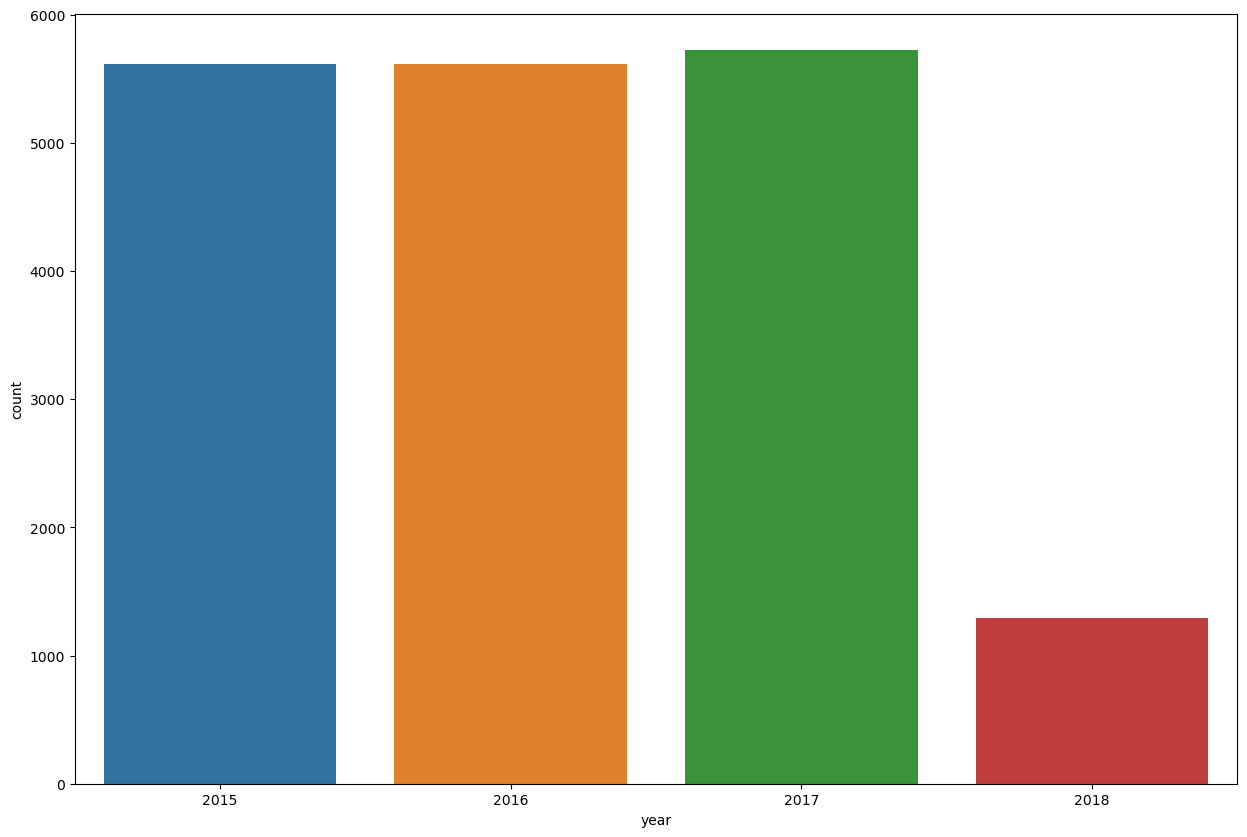

In [61]:
#VISULAIZING THE DATASET - COUNT OF AVAOCADOS BATCHES PER YEAR

plt.figure(figsize = (15,10))
ax = sns.countplot(x='year',data=avocado_df)

In [62]:
#CLEANING THE DATASET

avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df.head(17)

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [63]:
#RENAMING THE COLUNS

avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df.head(17)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [64]:
#FITTING THE PROPHET MODEL

m = Prophet()
m.fit(avocado_prophet_df)

19:37:27 - cmdstanpy - INFO - Chain [1] start processing
19:37:28 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
#MAKING A PREDICTION

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head(17)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498913,0.900878,1.858067,1.498913,1.498913,-0.114502,-0.114502,-0.114502,-0.114502,-0.114502,-0.114502,0.0,0.0,0.0,1.384411
1,2015-01-11,1.493725,0.910019,1.889772,1.493725,1.493725,-0.106114,-0.106114,-0.106114,-0.106114,-0.106114,-0.106114,0.0,0.0,0.0,1.387611
2,2015-01-18,1.488536,0.843791,1.859872,1.488536,1.488536,-0.105835,-0.105835,-0.105835,-0.105835,-0.105835,-0.105835,0.0,0.0,0.0,1.382702
3,2015-01-25,1.483348,0.863311,1.839766,1.483348,1.483348,-0.124833,-0.124833,-0.124833,-0.124833,-0.124833,-0.124833,0.0,0.0,0.0,1.358515
4,2015-02-01,1.478160,0.810938,1.793524,1.478160,1.478160,-0.153222,-0.153222,-0.153222,-0.153222,-0.153222,-0.153222,0.0,0.0,0.0,1.324938
5,2015-02-08,1.472972,0.828479,1.808652,1.472972,1.472972,-0.167491,-0.167491,-0.167491,-0.167491,-0.167491,-0.167491,0.0,0.0,0.0,1.305481
6,2015-02-15,1.467783,0.818689,1.804918,1.467783,1.467783,-0.154041,-0.154041,-0.154041,-0.154041,-0.154041,-0.154041,0.0,0.0,0.0,1.313742
7,2015-02-22,1.462595,0.872121,1.860069,1.462595,1.462595,-0.123153,-0.123153,-0.123153,-0.123153,-0.123153,-0.123153,0.0,0.0,0.0,1.339442
8,2015-03-01,1.457407,0.856022,1.836992,1.457407,1.457407,-0.097820,-0.097820,-0.097820,-0.097820,-0.097820,-0.097820,0.0,0.0,0.0,1.359587
9,2015-03-08,1.452218,0.866624,1.865432,1.452218,1.452218,-0.090175,-0.090175,-0.090175,-0.090175,-0.090175,-0.090175,0.0,0.0,0.0,1.362043


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Ensure 'ds' column is datetime in both DataFrames
forecast['ds'] = pd.to_datetime(forecast['ds'])
avocado_prophet_df['ds'] = pd.to_datetime(avocado_prophet_df['ds'])

# Merge actual and predicted values on 'ds'
merged_df = pd.merge(avocado_prophet_df, forecast[['ds', 'yhat']], on='ds')

# Extract actual and predicted values
y_true = merged_df['y']
y_pred = merged_df['yhat']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.3058
Root Mean Squared Error (RMSE): 0.3781
R² Score: 0.1183


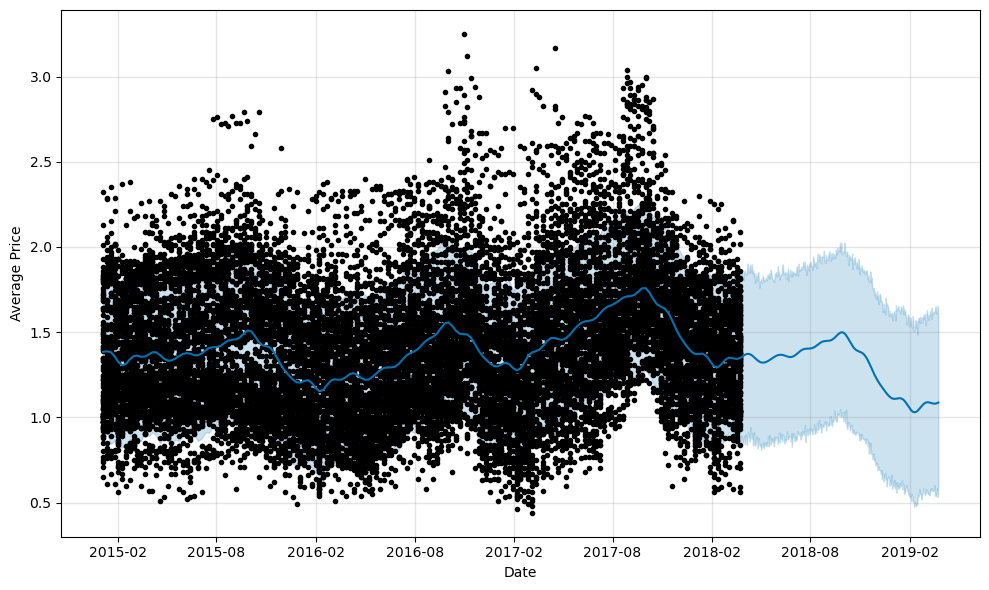

In [67]:
#VISUALIZING THE PREDICTION

figure = m.plot(forecast, xlabel='Date', ylabel='Average Price')

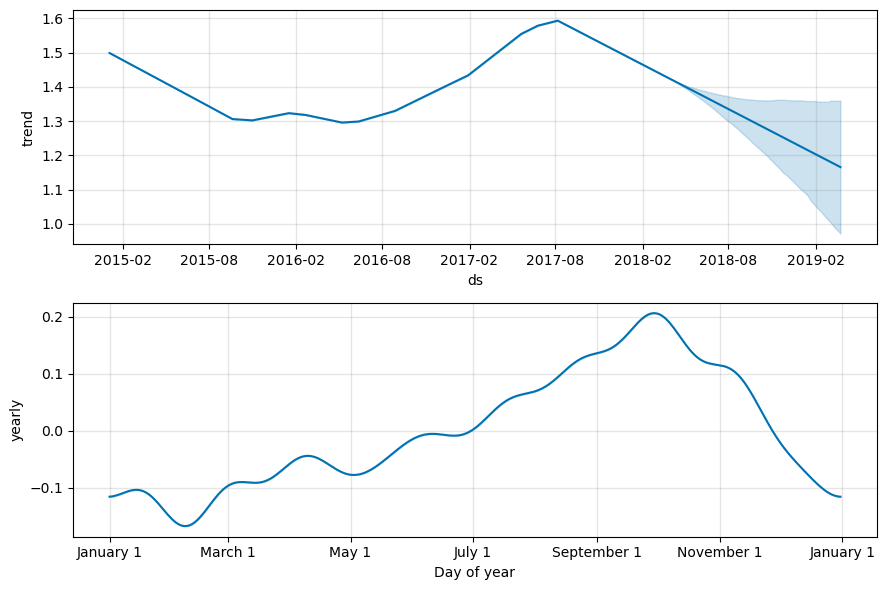

In [68]:
#PLOTTING THE COMPONENTS

figure = m.plot_components(forecast)

## THIS IS ANOTHER ITERATION OF THE SCRPT

In [69]:
#CREATING A NEW DATASET SPEFIC TO THE REGION

avocado_df_sample = avocado_df[(avocado_df['region'] == 'West') & (avocado_df['type'] == 'conventional')]
#avocado_df_sample.head(17)

In [70]:
#SORTINNG THE DATASET ACCORDING TO THE DATE

avocado_df_sample = avocado_df_sample.sort_values(by='Date')
#avocado_df_sample.head(17)  

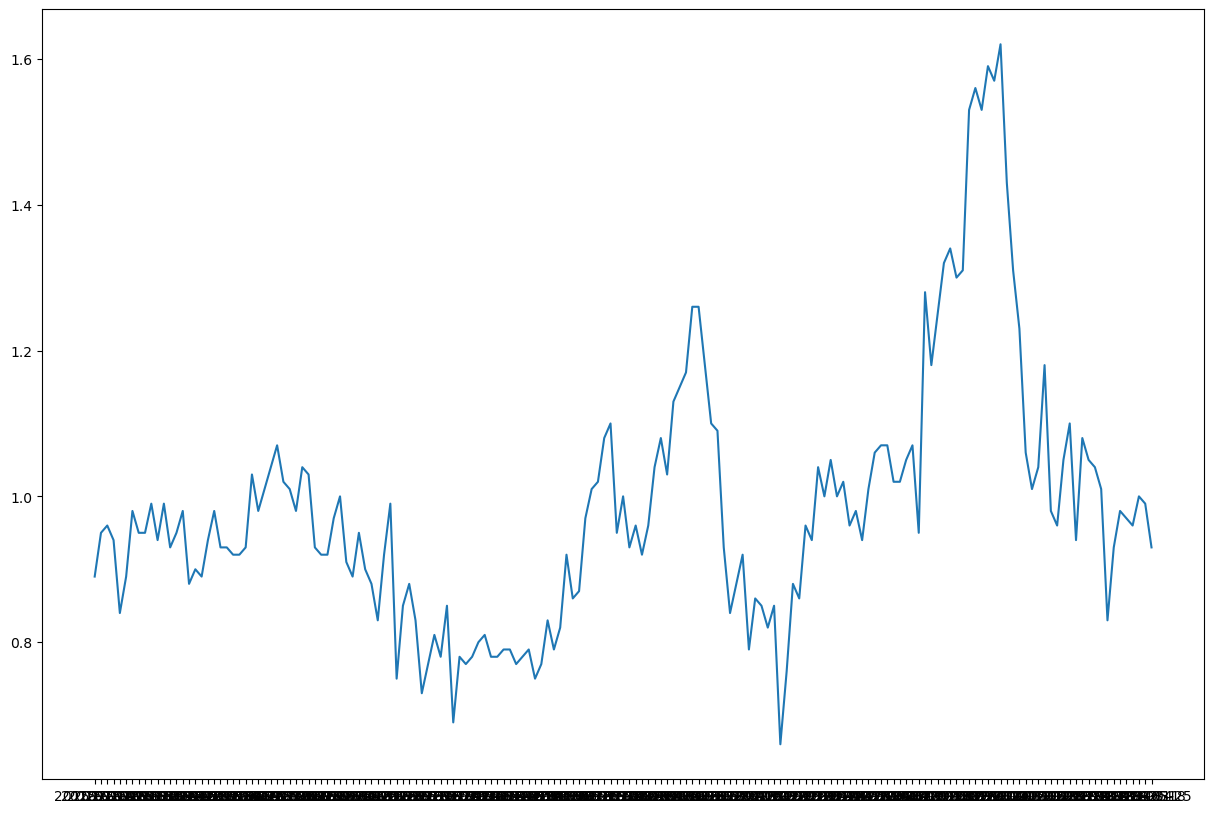

In [71]:
#VISUALIZING THE DATASET - DATE VS AVERAGE PRICE

plt.figure(figsize=(15, 10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [72]:
#CLEANING THE DATASET

avocado_prophet_df_sample = avocado_df_sample[['Date', 'AveragePrice']]
#avocado_prophet_df_sample.head(17)

In [73]:
#RENAMING THE COLUMNS

avocado_prophet_df_sample = avocado_prophet_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df_sample['y'] = avocado_prophet_df_sample['y'].rolling(window=3).mean()
avocado_prophet_df_sample.dropna(inplace=True)
avocado_prophet_df_sample.head(17)

,ds,y
2753,2015-01-18,0.933333
2752,2015-01-25,0.950000
2751,2015-02-01,0.913333
2750,2015-02-08,0.890000
2749,2015-02-15,0.903333
2748,2015-02-22,0.940000
2747,2015-03-01,0.960000
2746,2015-03-08,0.963333
2745,2015-03-15,0.960000
2744,2015-03-22,0.973333


In [74]:
#FITTING THE PROPHET MODEL

m = Prophet()
m.fit(avocado_prophet_df_sample)

19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
#MAKING A PREDICTION

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#forecast_sample.head(17)

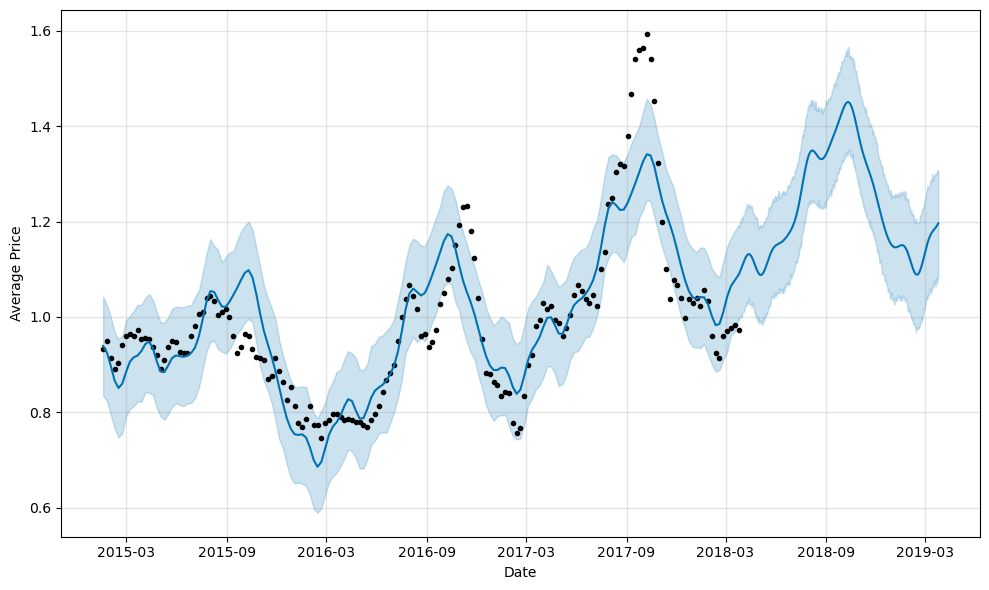

In [76]:
#VISUALIZING THE PREDICTION

figure = m.plot(forecast, xlabel='Date', ylabel='Average Price')

In [ ]:
#EVALUATING THE MODEL

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Ensure 'ds' column is datetime in both DataFrames
forecast['ds'] = pd.to_datetime(forecast['ds'])
avocado_prophet_df_sample['ds'] = pd.to_datetime(avocado_prophet_df_sample['ds'])

# Merge actual and predicted values on 'ds'
merged_df = pd.merge(avocado_prophet_df_sample, forecast[['ds', 'yhat']], on='ds')

# Extract actual and predicted values
y_true = merged_df['y']
y_pred = merged_df['yhat']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0569
Root Mean Squared Error (RMSE): 0.0783
R² Score: 0.7861


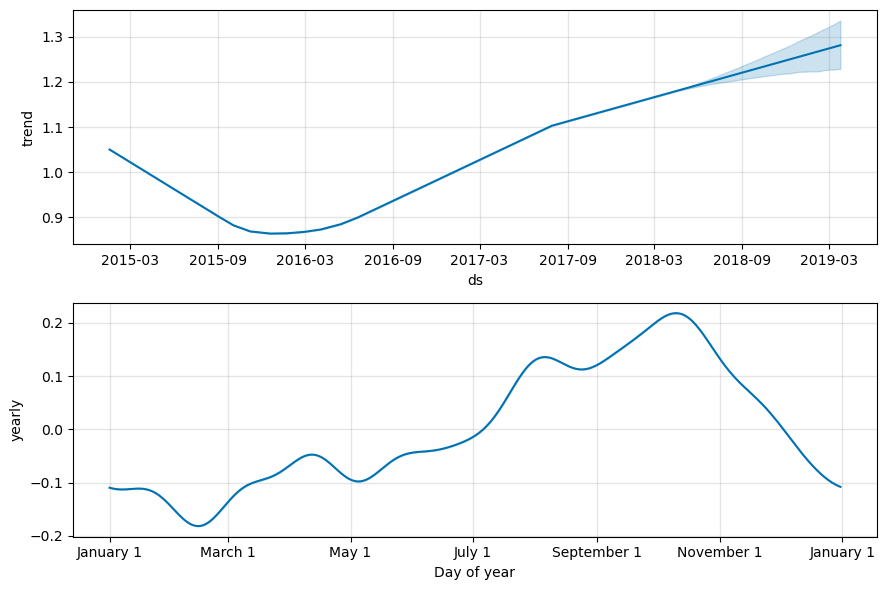

In [78]:
#PLOTTING THE COMPONENTS

figure = m.plot_components(forecast)

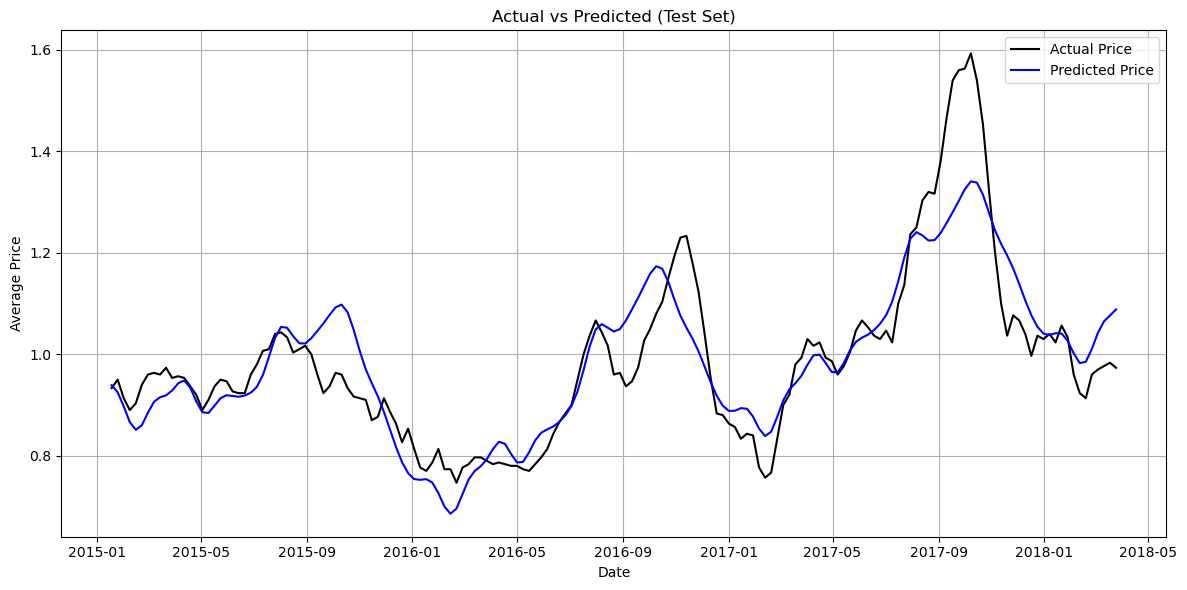

In [ ]:
#VISUALIZING THE ACTUAL VS PREDICTED PRICES


plt.figure(figsize=(12, 6))
plt.plot(merged_df['ds'], y_true, label='Actual Price', color='black')
plt.plot(merged_df['ds'], y_pred, label='Predicted Price', color='blue')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()